**Study on regression models.**

*   Linear Regression
*   Polynomial regression
*   Lasso Regression
*   Elastic Net
*   Ridge Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('/content/boston.csv')

In [2]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000




*   CRIM - per capita crime rate by town
*   ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
*   INDUS - proportion of non-retail business acres per town
*   ICHAS - Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
*   NOX - nitric oxides concentration (parts per 10 million)
*   RM - average number of rooms per dwelling
*   AGE - proportion of owner-occupied units built prior to 1940
*   DIS - weighted distances to five Boston employment centres
*   RAD - index of accessibility to radial highways
*   TAX - full-value property-tax rate per $10,000
*   PTRATIO - pupil-teacher ratio by town

*   B - B=1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
*    LSTAT - % lower status of the population
*   MEDV - Median value of owner-occupied homes in $1000's






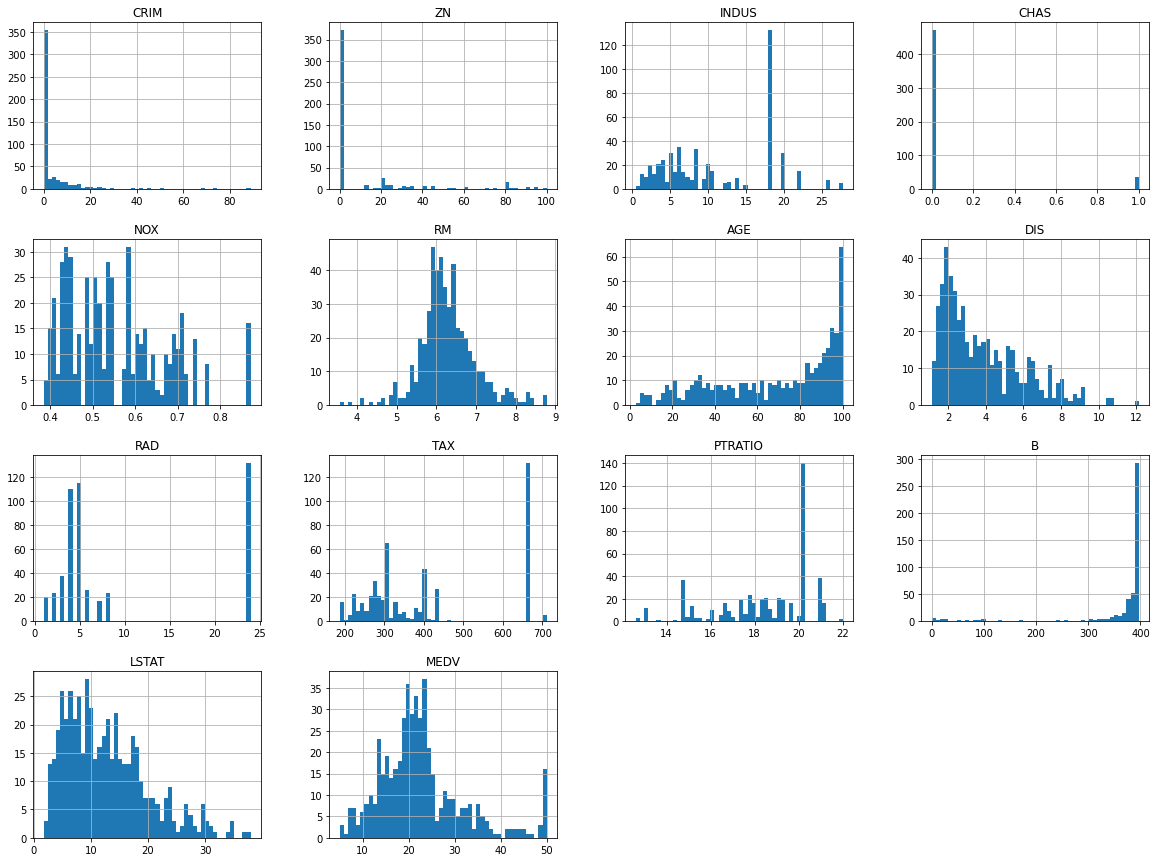

In [6]:
df.hist(bins=50, figsize=(20,15));

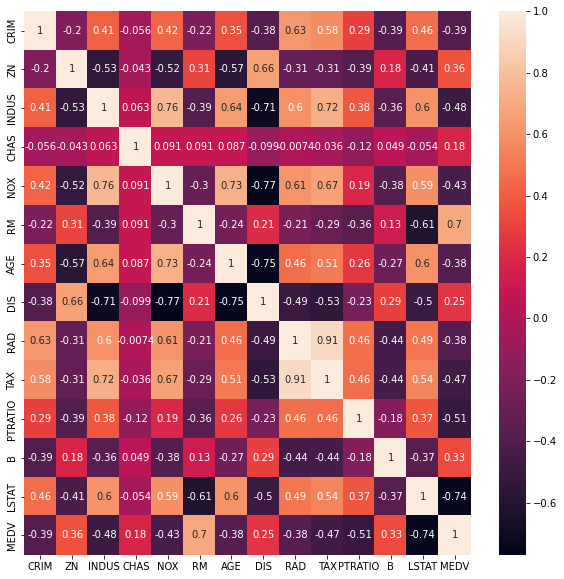

In [7]:
# Heatmap
corr_matrix = df.corr()
plt.figure(figsize = (10,10))
sns_plot=sns.heatmap(corr_matrix,annot=True)
plt.show()

**Splitting data**

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X = df[['CRIM','ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]
y = df['MEDV']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

**Select and Train a Model**

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
lm = LinearRegression(normalize=True)
reg = lm.fit(X_train, y_train);
lin_pred_test = lm.predict(X_test)
lin_pred_train = lm.predict(X_train)
score_test = reg.score(X_test, y_test)
score_train = reg.score(X_train, y_train)

print('Score for train data: ', score_train)
print('Score for test data: ', score_test)

Score for train data:  0.7454634121900363
Score for test data:  0.6640648675861126


(0.0, 10.0)

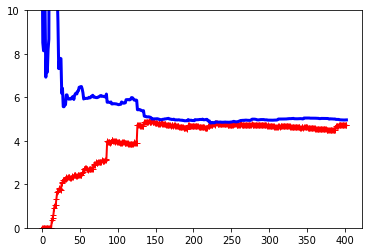

In [13]:
from sklearn.metrics import mean_squared_error
train_errors, test_errors = [], []
for m in range(1, len(X_train)):
  lm.fit(X_train[:m], y_train[:m])
  y_train_predict = lm.predict(X_train[:m])
  y_test_predict = lm.predict(X_test)
  train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
  test_errors.append(mean_squared_error(y_test, y_test_predict))
plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label='train')
plt.plot(np.sqrt(test_errors), "b-", linewidth=3, label='test')
plt.ylim(0,10)

**Adding Polynomial Features**

In [14]:
from sklearn.preprocessing import PolynomialFeatures
from tqdm import tqdm

In [15]:
poly_fea = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train  = poly_fea.fit_transform(X_train)
X_poly_test  = poly_fea.fit_transform(X_test)
lm.fit(X_poly_train,y_train)    
score_test = lm.score(X_poly_test, y_test)
score_train = lm.score(X_poly_train, y_train)
print('Score for train data: ', score_train)
print('Score for test data: ', score_test)

Score for train data:  0.9242259132401147
Score for test data:  0.8180049595825813


(0.0, 10.0)

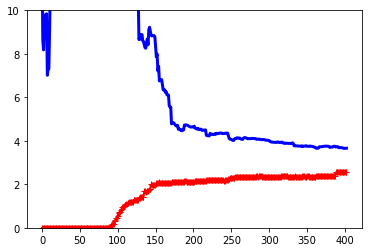

In [16]:
train_errors, test_errors = [], []
for m in range(1, len(X_poly_train)):
  lm.fit(X_poly_train[:m], y_train[:m])
  y_train_predict = lm.predict(X_poly_train[:m])
  y_test_predict = lm.predict(X_poly_test)
  train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
  test_errors.append(mean_squared_error(y_test, y_test_predict))
plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label='train')
plt.plot(np.sqrt(test_errors), "b-", linewidth=3, label='test')
plt.ylim(0,10)

**Scaler the data**

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_poly_train)
X_test_scaled = scaler.transform(X_poly_test)

# **Elastic Net**

In [20]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.05, l1_ratio=0.1)
elastic_net.fit(X_train_scaled, y_train)
score_test = elastic_net.score(X_test_scaled, y_test)
score_train = elastic_net.score(X_train_scaled, y_train)

print('Score for train data: ', score_train)
print('Score for test data: ', score_test)

Score for train data:  0.7275066430459081
Score for test data:  0.7007245517949258


(2.0, 8.0)

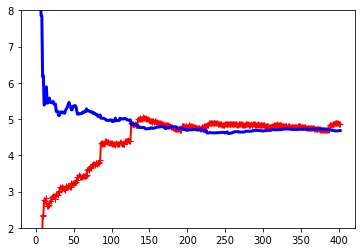

In [21]:
train_errors, test_errors = [], []
for m in range(1, len(X_train_scaled)):
  elastic_net.fit(X_train_scaled[:m], y_train[:m])
  y_train_predict = elastic_net.predict(X_train_scaled[:m])
  y_test_predict = elastic_net.predict(X_test_scaled)
  train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
  test_errors.append(mean_squared_error(y_test, y_test_predict))
plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label='train')
plt.plot(np.sqrt(test_errors), "b-", linewidth=3, label='test')
plt.ylim(2,8)

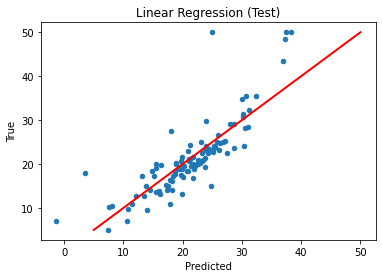

In [22]:
elastic_predict_train = elastic_net.predict(X_train_scaled)
elastic_predict_test = elastic_net.predict(X_test_scaled)

plt.scatter(elastic_predict_test, y_test, s=20)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=2)
plt.ylabel("True")
plt.xlabel("Predicted")
plt.title("Linear Regression (Test)")
plt.show()

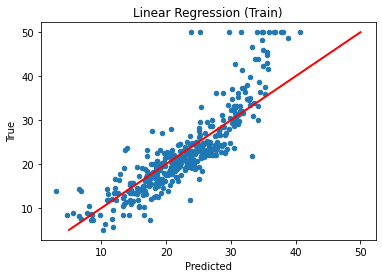

In [23]:
plt.scatter(elastic_predict_train, y_train, s=20)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r', lw=2)
plt.ylabel("True")
plt.xlabel("Predicted")
plt.title("Linear Regression (Train)")
plt.show()

# **Lasso Regression**

In [24]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train_scaled, y_train)
score_test = lasso_reg.score(X_test_scaled, y_test)
score_train = lasso_reg.score(X_train_scaled, y_train)

print('Score for train data: ', score_train)
print('Score for test data: ', score_test)

Score for train data:  0.7562735959999599
Score for test data:  0.7104033739398272


(2.0, 8.0)

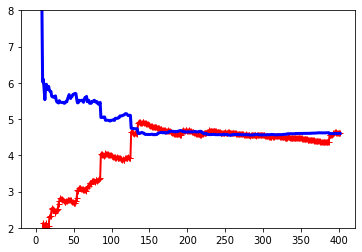

In [25]:
train_errors, test_errors = [], []
for m in range(1, len(X_train_scaled)):
  lasso_reg.fit(X_train_scaled[:m], y_train[:m])
  y_train_predict = lasso_reg.predict(X_train_scaled[:m])
  y_test_predict = lasso_reg.predict(X_test_scaled)
  train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
  test_errors.append(mean_squared_error(y_test, y_test_predict))
plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label='train')
plt.plot(np.sqrt(test_errors), "b-", linewidth=3, label='test')
plt.ylim(2,8)

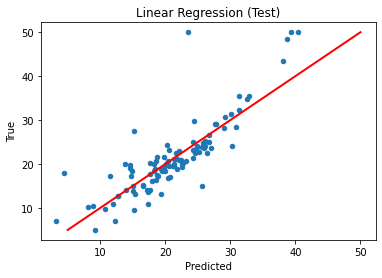

In [26]:
lasso_predict_train = lasso_reg.predict(X_train_scaled)
lasso_predict_test = lasso_reg.predict(X_test_scaled)

plt.scatter(lasso_predict_test, y_test, s=20)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=2)
plt.ylabel("True")
plt.xlabel("Predicted")
plt.title("Linear Regression (Test)")
plt.show()

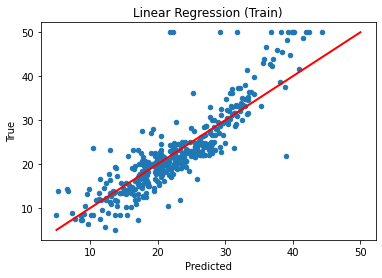

In [27]:
plt.scatter(lasso_predict_train, y_train, s=20)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r', lw=2)
plt.ylabel("True")
plt.xlabel("Predicted")
plt.title("Linear Regression (Train)")
plt.show()

# **Ridge Regression**

In [28]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=0.05)
ridge_reg.fit(X_train_scaled, y_train)
score_test = ridge_reg.score(X_test_scaled, y_test)
score_train = ridge_reg.score(X_train_scaled, y_train)

print('Score for train data: ', score_train)
print('Score for test data: ', score_test)

Score for train data:  0.9014822883498451
Score for test data:  0.8533349461725364


(2.0, 5.0)

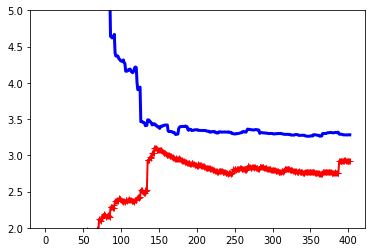

In [29]:
train_errors, test_errors = [], []
for m in range(1, len(X_train_scaled)):
  ridge_reg.fit(X_train_scaled[:m], y_train[:m])
  y_train_predict = ridge_reg.predict(X_train_scaled[:m])
  y_test_predict = ridge_reg.predict(X_test_scaled)
  train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
  test_errors.append(mean_squared_error(y_test, y_test_predict))
plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label='train')
plt.plot(np.sqrt(test_errors), "b-", linewidth=3, label='test')
plt.ylim(2,5)

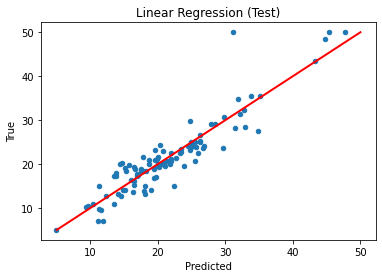

In [30]:
ridge_pred_train = ridge_reg.predict(X_train_scaled)
ridge_pred_test = ridge_reg.predict(X_test_scaled)

plt.scatter(ridge_pred_test, y_test, s=20)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=2)
plt.ylabel("True")
plt.xlabel("Predicted")
plt.title("Linear Regression (Test)")
plt.show()

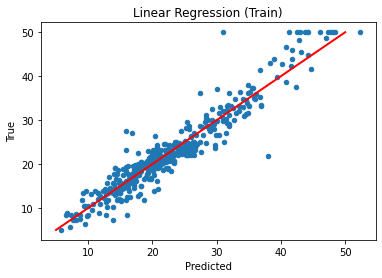

In [31]:
plt.scatter(ridge_pred_train, y_train, s=20)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r', lw=2)
plt.ylabel("True")
plt.xlabel("Predicted")
plt.title("Linear Regression (Train)")
plt.show()